In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import det
%config InlineBackend.figure_format = "retina"
plt.style.use("seaborn")

### Misc

- Can we have some tasks to work on from the beginning and see how to ameliorate gradually the result by what we've learnt.
- Why the noise affect by sum of Gaussian distribution instead of product etc?
- Why do we model the prior distribution as Gaussian distribution.
- 1. Maximum likelihood; 2. Maximum posterior. Which is better?
- How Information Theory is useful in ML.

## Two ~~rival~~ probabilistic points of view
+todo
- Frequentist probabilities
- Bayesian probabilities

## The Gaussian Distribution

- For a single real variable, the distribution that maximizes the entropy is the Gaussian. This property also applies the multivariate Gaussian.
- The central limit theorem tells us that, subject to certain mild conditions, the sum of a set of random variables, which is of course itself a random variable, has a distribution that becomes increasingly Gaussian as the number of terms in the sum increases; so we often consider that the noise follows the gaussian distribution.

The gaussian distribution is defined in the following way:
$$
    \mathcal{N}(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}
$$

An alternative way to represent a gaussian distribution is by considering a *precision* term denoted by $\beta := 1 / \sigma^2$
$$
    \mathcal{N}(x | \mu, \beta^{-1}) = \frac{\beta^{1/2}}{\sqrt{2\pi}}e^{-\frac{\beta}{2}(x - \mu)^2}
$$

$\mu$ is called the mean, $\sigma^2$ is called the variance, $\beta$ is called the precision.

$$
    \mathcal{N}(x | \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}\det(\Sigma)^{1/2}}\exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\right)
$$

We can see that mu is the expected value


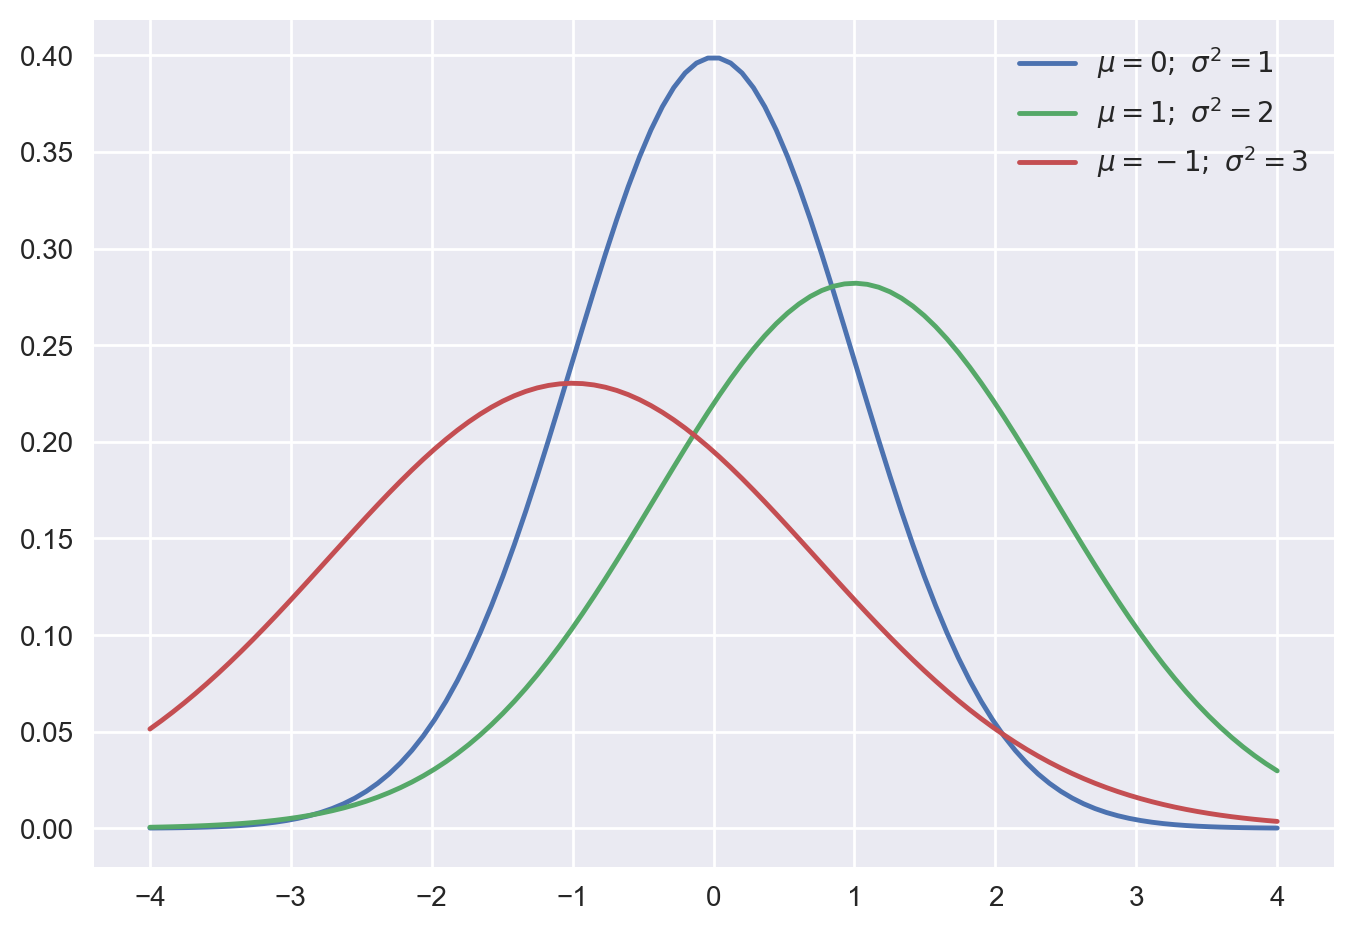

In [19]:
def norm_pdf(x, mu, sigma2):
    return 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))

def plthere(xrange, mu, sigma2):
    plt.plot(xrange, norm_pdf(xrange, mu, sigma2),
              label=r"$\mu="+str(mu)+r"; \ \sigma^2="+str(sigma2)+r"$")

xrange = np.linspace(-4, 4, 100)
plthere(xrange, 0, 1)
plthere(xrange, 1, 2)
plthere(xrange, -1, 3)
plt.legend()
print("We can see that mu is the expected value")

## Curve fitting

Training data $x = (x_1, \ldots, x_n)^T$, $t = (t_1, \ldots, t_n)^T$.

Our goal is to predict $\hat{t}$ for $\hat{x}$ given a postiori.

Soit $P(X) = a_0 + \cdots + a_m x^m$.

>Functions, such as the polynomial, which are linear in the unknown parameters have important properties and are called linear models and will be discussed extensively in Chapters 3 and 4.

$E(w) = {1\over 2} \sum_{k=1}^n (P(x_n)-t_n)^2$ an error function.

$E_{\mathrm{RMS}}=\sqrt{2 E\left(w\right) / n}$ to allow us to compare for date of different $n$.

For bigger $m$, it works well for bigger $n$, when $n=m+1$ we most certainly will have overfitting.

>By adopting a Bayesian approach, the over-fitting problem can be avoided.

## Gauss

Suppose we have a distribution $\mathcal{N}\left(\mu_0, \sigma_0^2\right)$.  
We observe $\mathbf{x}$.

$$
p\left(\mathbf{x} \mid \mu, \sigma^2\right)=\prod_{n=1}^N \mathcal{N}\left(x_n \mid \mu, \sigma^2\right)
$$
is a likelihood function sending $\mu, \sigma$ to _.

We want to maximize it so to find the likely $\mu$ et $\sigma$.

$$
\ln p\left(\mathbf{x} \mid \mu, \sigma^2\right)=-\frac{1}{2 \sigma^2} \sum_{n=1}^N\left(x_n-\mu\right)^2-\frac{N}{2} \ln \sigma^2-\frac{N}{2} \ln (2 \pi)
$$
ln is monotonic.

$$
\mu_{\mathrm{ML}}=\frac{1}{N} \sum_{n=1}^N x_n \\
\sigma_{\mathrm{ML}}^2=\frac{1}{N} \sum_{n=1}^N\left(x_n-\mu_{\mathrm{ML}}\right)^2
$$
by math...

\begin{aligned}
\mathbb{E}\left[\mu_{\mathrm{ML}}\right] & =\mu_0 \\
\mathbb{E}\left[\sigma_{\mathrm{ML}}^2\right] & =\left(\frac{N-1}{N}\right) \sigma_0^2
\end{aligned}

So in average the mean value can be correctly estimated but the variance is systematically underestimated.



## Curve fitting, probabilistic

$$
p(t \mid x, \mathbf{w}, \beta)=\mathcal{N}\left(t \mid y(x, \mathbf{w}), \beta^{-1}\right)
$$

$$
p(\mathbf{w} \mid \alpha)=\mathcal{N}\left(\mathbf{w} \mid \mathbf{0}, \alpha^{-1} \mathbf{I}\right)=\left(\frac{\alpha}{2 \pi}\right)^{(M+1) / 2} \exp \left\{-\frac{\alpha}{2} \mathbf{w}^{\mathrm{T}} \mathbf{w}\right\}
$$
called the prior. I don't know why we assign it as Gaussian distribution.

$\alpha, \beta$ are the variables, and $y$ is the modelling function. $\mathbf{w}$ is the parameter for the modelling function.

We may take 2 approaches to get $\mathbf{w}_\mathrm{ML}$ and $\mathbf{w}_\mathrm{MAP}$.

1. Maximum likelihood;
2. Maximum posterior.

Then we can output a $p(t' \mid x', \mathbf{w}, \beta)$ for given $x'$.

Maximum posterior is interesting.

$$
p(\mathbf{w} \mid \mathbf{x}, \mathbf{t}, \alpha, \beta) \propto p(\mathbf{t} \mid \mathbf{x}, \mathbf{w}, \beta) p(\mathbf{w} \mid \alpha)
$$
by Bayes' formula.

## Information Theory

A rarer event happening is more information. We note $p(A), h(A)$ the probability of an event $A$ and the _ of the event. $H(X) = \mathbb{E}(h(x))$ is the entropy.

For 2 irrelevant events, $p(A, B) = p(A)p(B), h(A, B) = h(A) + h(B)$. So be $h(A)$ something like $-\log_2(p(A))$, negative because a rarer event brings more information. 